## Код из методички, ДЗ ниже

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn import model_selection

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [98]:
X, y = load_diabetes(return_X_y=True)

In [99]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [32]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [10]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1200.3184209714448
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4232.655535586426


In [13]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

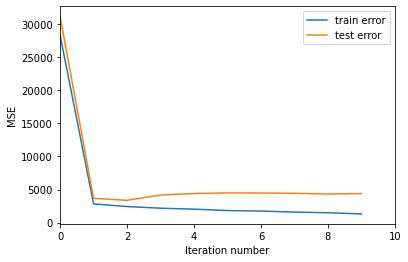

In [14]:
get_error_plot(n_trees, train_errors, test_errors)

In [15]:
n_trees = 50
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [16]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 67.91462594624531
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5040.305550100763


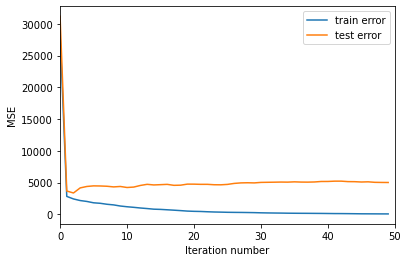

In [17]:
get_error_plot(n_trees, train_errors, test_errors)

In [18]:
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [19]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1446.4542734528454
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3057.3104034866287


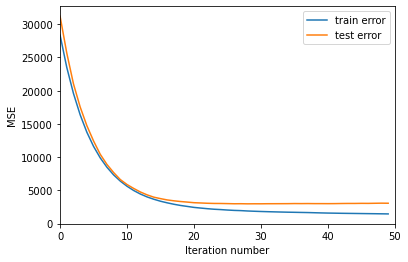

In [20]:
get_error_plot(n_trees, train_errors, test_errors)

In [21]:
eta = 0.01

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [22]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 12069.438338524034
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 12835.814960030917


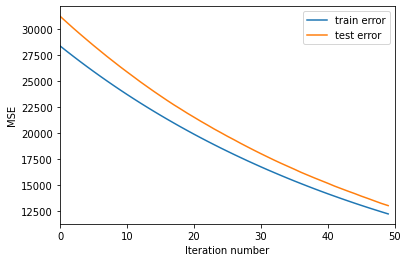

In [23]:
get_error_plot(n_trees, train_errors, test_errors)

In [24]:
eta = 0.1
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [25]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 328.4986513026104
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3316.928248520861


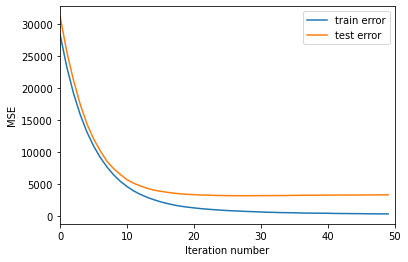

In [26]:
get_error_plot(n_trees, train_errors, test_errors)

## Задача 1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров. 

In [64]:
def evaluate_alg_error(X_train, X_test, y_train, y_test, trees, coefs, eta):
    """
    В начале перепишем функцию, чтобы получить значение ошибки
    """ 
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    
    return mean_squared_error(y_train, train_prediction), mean_squared_error(y_test, test_prediction)


In [66]:
# Зададим число деревьев в ансамбле от 1 до 30
n_trees = np.arange(1, 31)

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

train_msem, test_mse = [], []

for n_tree in n_trees:
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_tree
    trees, train_errors, test_errors = gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    mse_train, mse_test = evaluate_alg_error(X_train, X_test, y_train, y_test, trees, coefs, eta)
    train_mse.append(mse_train)
    test_mse.append(mse_test)

In [67]:
# Немного изменим функцию построения графика 
def get_plot_by_trees(n_trees, train_err, test_err):
    plt.xlabel('Tree number')
    plt.ylabel('MSE')
    plt.plot(n_trees, train_err, label='train error')
    plt.plot(n_trees, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

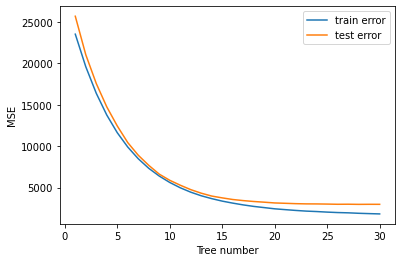

In [68]:
get_plot_by_trees(n_trees, train_mse, test_mse)

In [69]:
# Зададим число деревьев равное 16
n_trees = 16

# Максимальная глубина деревьев
max_depth = np.arange(1, 16)

# Шаг
eta = 0.1

train_msem, test_mse = [], []

for md in max_depth:
    # для простоты примем коэффициенты равными 1
    coefs = [1] * n_tree
    trees, train_errors, test_errors = gb_fit(n_tree, md, X_train, X_test, y_train, y_test, coefs, eta)
    mse_train, mse_test = evaluate_alg_error(X_train, X_test, y_train, y_test, trees, coefs, eta)
    train_mse.append(mse_train)
    test_mse.append(mse_test)

In [70]:
# Немного изменим функцию построения графика 
def get_plot_by_depth(max_depth, train_err, test_err):   
    plt.xlabel('Max depth')
    plt.ylabel('MSE')
    plt.plot(max_depth, train_err, label='train error')
    plt.plot(max_depth, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

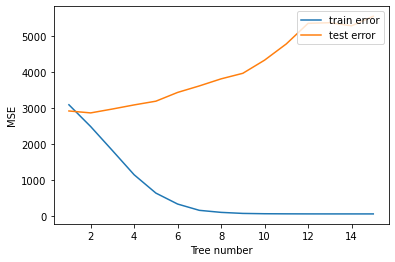

In [71]:
get_plot_by_trees(max_depth, train_mse, test_mse)

### Вывод

Как видно из граффиков, если увеличивать количество деревьев, то ошибка быстро выходит на плато, а если увелить глубину деревьев, то модель очень быстро переобучается 

## Задача 2

2*. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [100]:
"""
нам понадобиться модуль random 
"""
import random 
random.seed(42)

In [129]:
def random_sample(df):
    """
    Для стохастического спуска нам понадобиться случайный кусок данных, эта функция его возвращает
    """
    n = df.shape[0]
    train_index =  np.random.randint(0, n , size = int(n / 2))
    test_index = set(np.arange(0, n)).difference(set(train_index))
    return np.array(list(train_index)), np.array(list(test_index))

In [102]:
def gbst_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])


In [130]:
def gbst_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        # Использую нашу функцию стохастических индеков
        train_indexes, test_indexes = random_sample(X)
        X_train_st, y_train_st = X[train_indexes], y[train_indexes]
        X_test_st, y_test_st = X[test_indexes], y[test_indexes]
        
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_st, y_train_st)
            
            train_errors.append(mean_squared_error(y_train_st, gbst_predict(X_train_st, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_st, gbst_predict(X_test_st, trees, coefs, eta)))
        
        else:    
            
            # Получим ответы на текущей композиции
            target = gbst_predict(X_train_st, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_st, bias(y_train_st, target))
            
            train_errors.append(mean_squared_error(y_train_st, gbst_predict(X_train_st, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_st, gbst_predict(X_test_st, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [131]:
def evaluate_alg_st(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gbst_predict(X_train, trees, coefs, eta)
    test_prediction = gbst_predict(X_test, trees, coefs, eta)

    return mean_squared_error(y_train, train_prediction), mean_squared_error(y_test, test_prediction)

In [132]:
# test
eta = 0.1
max_depth = 2
n_trees = 16
coefs = [1] * n_tree


trees, train_errors, test_errors = gbst_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [133]:
evaluate_alg_st(X_train, X_test, y_train, y_test, trees, coefs, eta)

(3542.9084681479612, 4056.0878366858424)

Построим граффики для разного количества итераций

In [134]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

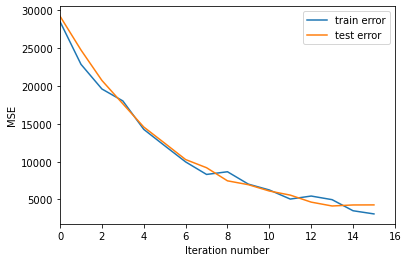

In [135]:
get_error_plot(n_trees, train_errors, test_errors)

In [136]:
n_trees = 50
coefs = [1] * n_trees

trees, train_errors, test_errors = gbst_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

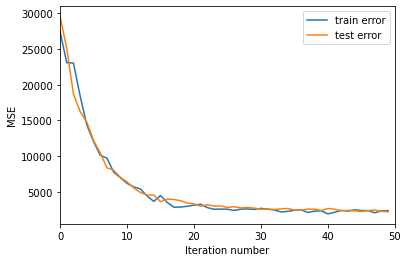

In [137]:
get_error_plot(n_trees, train_errors, test_errors)